This course was Funded by the European Union through the DIGIQ project (GA 101084035). Views and opinions expressed are however those of the author(s) only and do not necessarily reflect those of the European Union. Neither the European Union nor the granting authority can be held responsible for them.

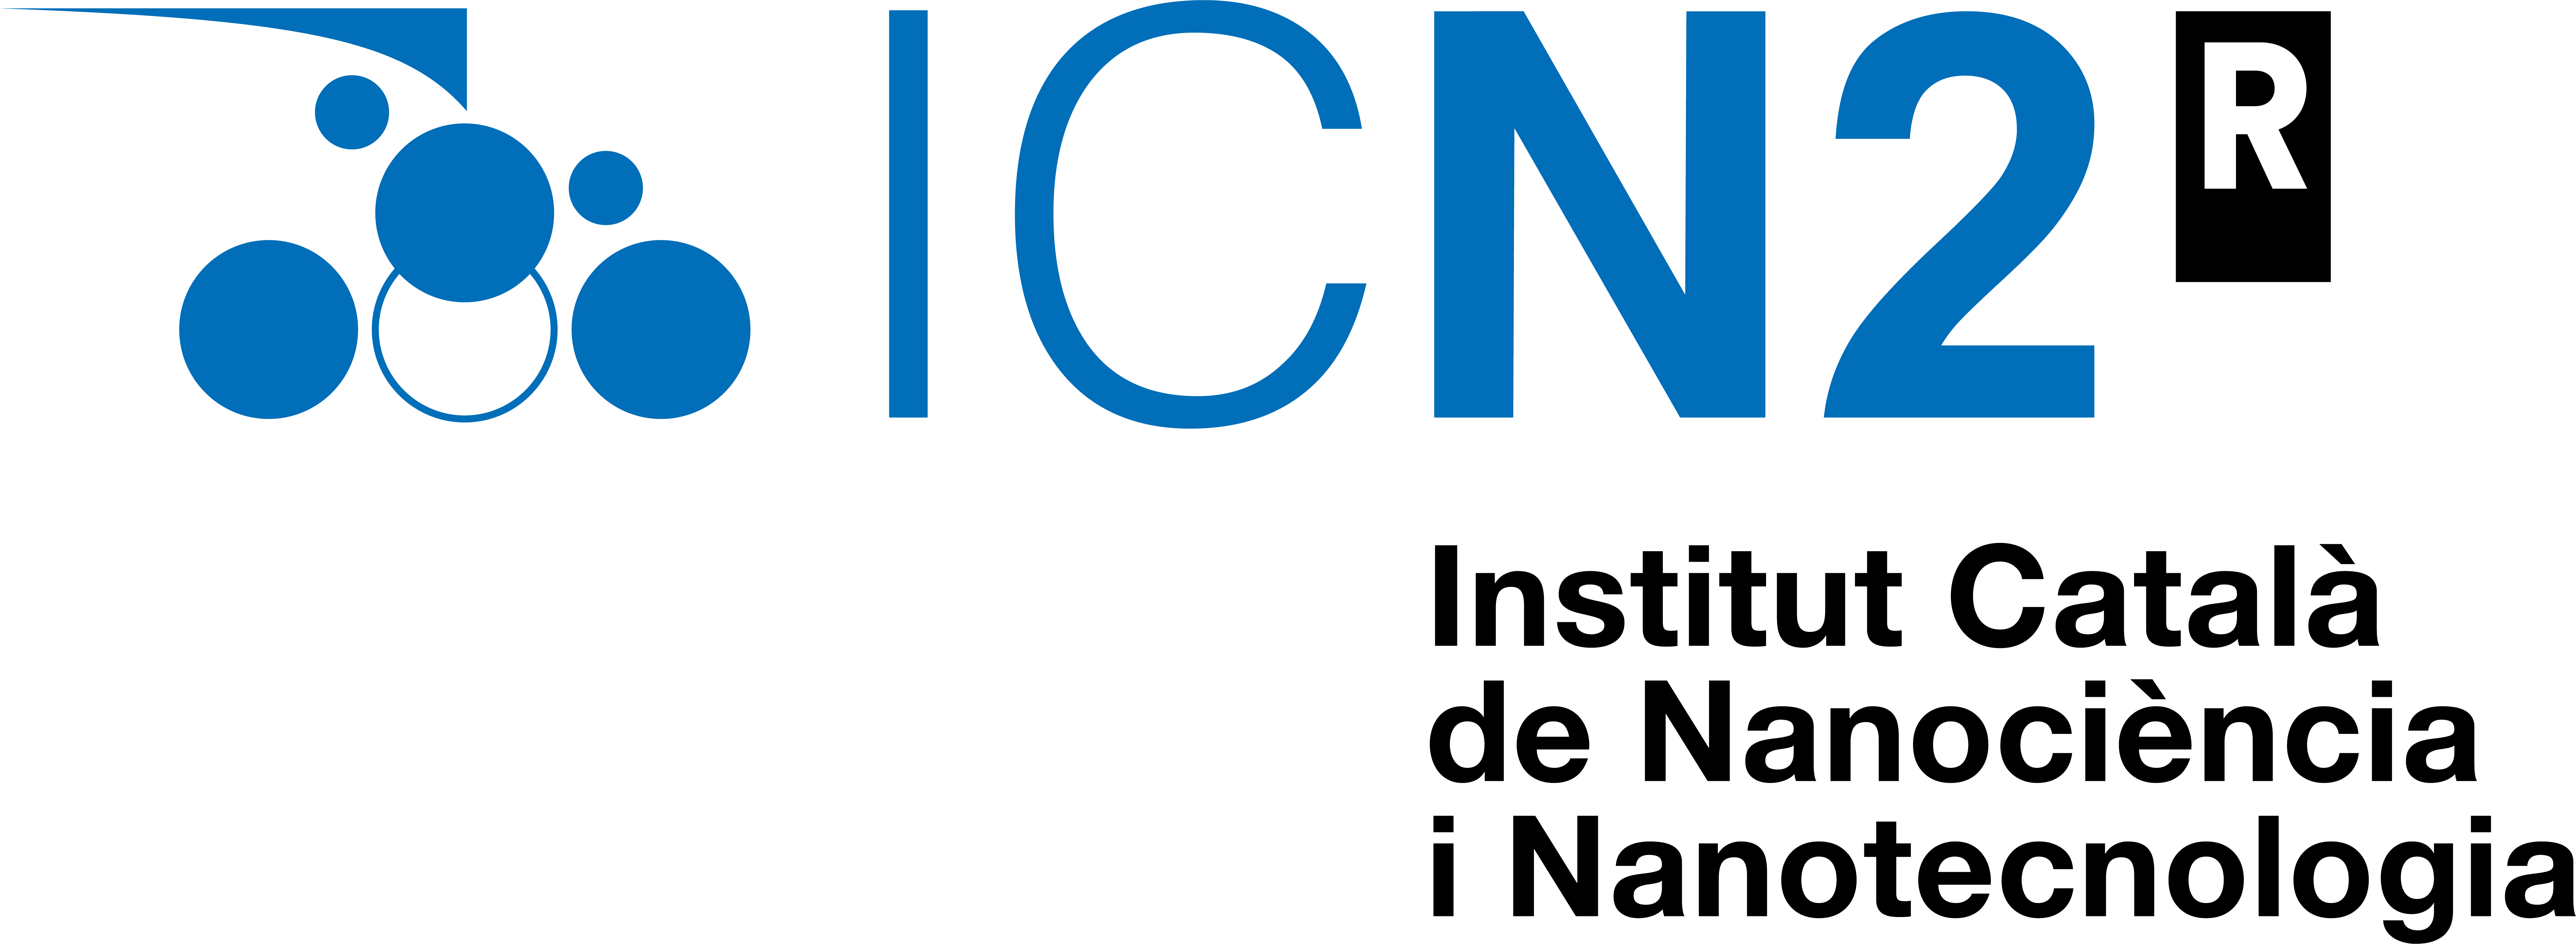

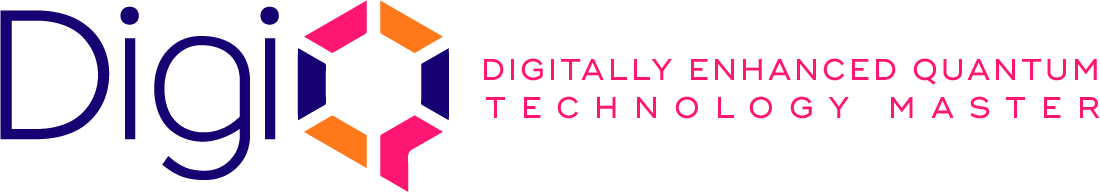

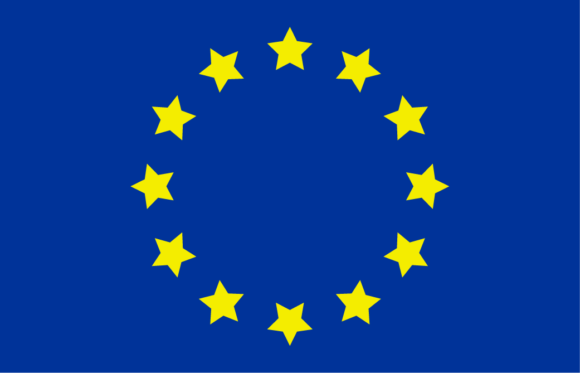


# Step 0: Python Package Installation

In [ ]:
%%bash
rm -Rf topquantmat/ && git clone https://github.com/quantummasterbarcelonacode/topquantmat.git&>log
cd topquantmat
bash pull_from_conda.sh
conda install -c conda-forge ipympl -y&>log

Installing packages for the activity
conda is installed
All requested packages already installed.


In [ ]:
from IPython.display import display, Math,Markdown #Allow to manipulate expressions and how to display them
import numpy as np  #Package for handling numerical math
import sympy as sp  #Package for handling symbolic  math
from sympy import Q #Q is a way to input constrains
from sympy import latex # Convert sympy expression into latex to render in display
from sympy import oo

#IMPORTANT
import topquantmat.tutorial as my #A package build for this session. Feel free to explore it.
import qsymm        #Package to build models using symmetries

from google.colab import output
output.enable_custom_widget_manager()

#Matplot lib is the plottong library
import matplotlib as mp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib widget

print(my.welcome)
def my_print(message):
  display(Markdown(message))
def print_eq(suffix, eq):
  display(Markdown(suffix + r" $%s$ "%latex(eq)))

def VelOP(Psi,E, coord_syst, vars ):
  D = sp.diff;  kron_delta=my.delta;
  dim = len(E);
  V = [ sp.eye(dim),sp.eye(dim) ]
  if coord_syst=="polar":
    k,phi= vars;
    for i,x in enumerate(vars):
      for m in range(dim):
        for n in range(dim):
          V[i][m,n]= D(E[m],x)* kron_delta(m,n) + (E[m]-E[n])*my.dot( Psi[m], D(Psi[n],x) );
    V[1]=V[1]/k;
    return [sp.simplify(V[0]),sp.simplify(V[1])]

Packages are loaded. ¡Welcome!


# General Definitions

In [ ]:
my_print("**Cartesian momentum**")
k_x, k_y,k_z = sp.symbols(["k_x","k_y","k_z"], real=True);
momenta= sp.Array([k_x,k_y, k_z]);

print_eq(r"$\vec{k}=$",momenta);

**Cartesian momentum**

$\vec{k}=$ $\left[\begin{matrix}k_{x} & k_{y} & k_{z}\end{matrix}\right]$ 

In [ ]:
my_print("**Polar momentum**")
k     = sp.Symbol("k",positive=True);
phi   = sp.Symbol("phi",real=True);
polar =[ (  k_x,  k*sp.cos(phi) ) ,
         (  k_y,  k*sp.sin(phi) )
         ];
print_eq(r"$\vec{k}=$",[k*sp.cos(phi),k*sp.sin(phi),k_z]);

**Polar momentum**

$\vec{k}=$ $\left[ k \cos{\left(\phi \right)}, \  k \sin{\left(\phi \right)}, \  k_{z}\right]$ 

In [ ]:
my_print("**Pauli matrices**")
sig0 = sp.Matrix([[1,    0],[0   , 1]]);
sigx = sp.Matrix([[0,    1],[1   , 0]]);
sigy = sp.Matrix([[0,-sp.I],[sp.I, 0]]);
sigz = sp.Matrix([[1,    0],[0   ,-1]]);
spins= [sigx,sigy,sigz];

for i,spin in zip(('x','y','z'),spins):
  print_eq(r"$\sigma_{%s}=$"%i,spin);

**Pauli matrices**

$\sigma_{x}=$ $\left[\begin{matrix}0 & 1\\1 & 0\end{matrix}\right]$ 

$\sigma_{y}=$ $\left[\begin{matrix}0 & - i\\i & 0\end{matrix}\right]$ 

$\sigma_{z}=$ $\left[\begin{matrix}1 & 0\\0 & -1\end{matrix}\right]$ 

# Graphene
In this section we will construct a symmetry-based model for graphene. We will start by defining the essential elements of the model.

![graphene_cell.jpg](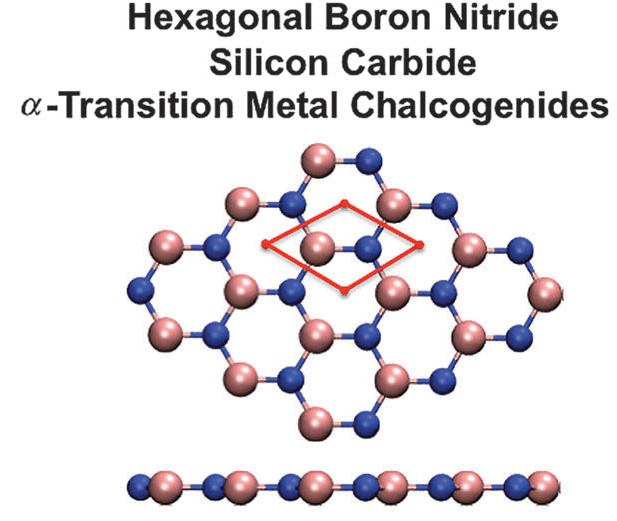t6oBHn8K8zE4hU07lJHq/wAFf2yfEXheODTfGcLaxp6/KL1f9eg6AEdCK+zPBfxA0H4gaYl9oeow3sRHzKjfMh9CPWvhu++ErxWZcw9vSvPptQ174Z6suo6FqE+nXUZyGibAPsR3r42vgMPjG5Ufdl+BupOO5+o9FfHnwf8A2+NKvpodJ8exLpd0TsXUo/8AUntlx1BNfW2k6zY69YRXunXcN7aSqGSaFwykH6V8xicHXwkuWrG3n0NVJS2LtIzBVJJwB1Jrz34rfHjwd8HdNa41/VYo7kgmKyjYNNKR2A7fjXxX8Sv2wvFHxYuJdP0TfoGhsSuyJv30qn+83b8K6MJltfF+9FWj3f8AWonJI+r/AIuftReF/hmktnayrrWtLkC1tmysbdt57CvhH40fGXxx8Yrh/wC1L2S103dmPT7VisS+x7t+NdL4S8Byavh3DSu3JZuSa6TWvhS1raFmixxnpX1GFo4XAyVtZd3+nYyk3I+NtW8PtDnK1zyyT6bcB4nKFTn2/KvfPG3hUWjP8uK8Y8QWPkyNxjmvsaNZVEYNWKkd9aXGJZ7YGaMFiq/dlP8Aten4VBJeXGpMsedsSjasa8ADPT3qtB/y0H+ya3PDun+fIox1rpdo6iJNM8OvcYO2vSfh54i8V/C/VI9S8OancafOnVUb5G9ivQ10HgbwZ9u8sbM59q9eh+ELtZb/ACe3pXiYjGQV4T1TNFE9j+C/7dGla99n0rxzCmiagfkF+ufIftlvQmvqrT9RtdVtIrqzuI7q3kUMkkTBlIPuK/Kbxx4F/s/zBsxWX8Of2kPG3wJ1IHSr97vS92ZNNumLRN9O4/CvmsRktPEr2mEdn26f8A1VRrc/XaivGv2a/wBpbRv2jdD1GfT7Sax1HShCL63kwQrSb9pU9wfLavZa+OrUamHqOlVVpI2TuroKKKKxGf/Z)

## Geometry

In [ ]:
sites= ['a', 'b']
norbs=( ("a",1), ("b",1) )

my_print("**Lattice vectors**")
lat_vec= my.graphene.lat_vec;
for i,lat in enumerate(lat_vec):
  print_eq(r'$ \vec{a}_{%d}=$'%i,lat);

my_print("**Hopping vector**")
hop_v= -(lat_vec[0]+lat_vec[1])/3 ;
hopping_vectors = [ ( 'a', 'b', hop_v) ];
print_eq(r'$\vec{\delta}=$',hop_v);

**Lattice vectors**

$ \vec{a}_{0}=$ $\left[\begin{matrix}\frac{1}{2} & \frac{\sqrt{3}}{2} & 0\end{matrix}\right]$ 

$ \vec{a}_{1}=$ $\left[\begin{matrix}- \frac{1}{2} & \frac{\sqrt{3}}{2} & 0\end{matrix}\right]$ 

$ \vec{a}_{2}=$ $\left[\begin{matrix}0 & 0 & 1\end{matrix}\right]$ 

**Hopping vector**

$\vec{\delta}=$ $\left[\begin{matrix}0 & - \frac{\sqrt{3}}{3} & 0\end{matrix}\right]$ 

## Symetries

**QSYMM** is a package that allow to build symmetry operators and use them to build model. Graphene belongs to the spacegroup P6/mmm in the internationa notation or D$_{6h}$ in sconflies notation . This means, hexagonal translation and six-fold rotation, inversion, and time-reversal point gpoup symmetries.


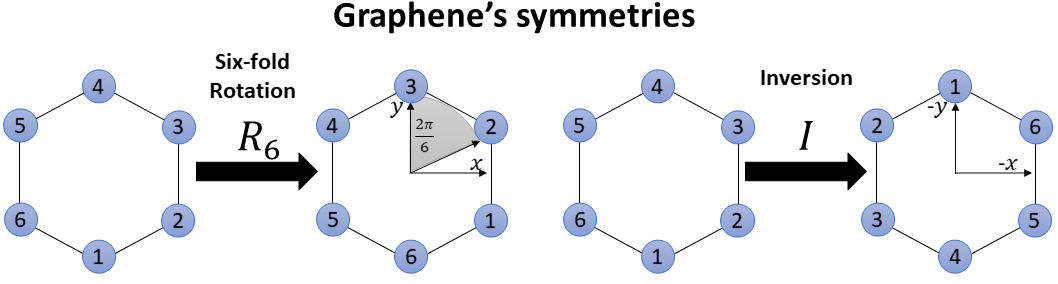

In [ ]:
my_print("**Rotation matrix**")
R = my.Rz(2*sp.pi/6);
print_eq(r'$R_6=$',R);
C6 = qsymm.groups.PointGroupElement(R ,U= np.array(sigx, dtype=int) )

my_print("**Inversion Matrix**")
I = qsymm.groups.inversion( realspace_dim= 3, U = np.array(sigx, dtype=int) );
print_eq(r'$I=$',sp.Matrix(I.R));

my_print("**Time Reversal Symmetry**")
TR= qsymm.time_reversal(realspace_dim=3,U= np.array(sig0, dtype=int) )
print_eq(r'${\rm TR}=K$',sp.Matrix(TR.R));

**Rotation matrix**

$R_6=$ $\left[\begin{matrix}\frac{1}{2} & - \frac{\sqrt{3}}{2} & 0\\\frac{\sqrt{3}}{2} & \frac{1}{2} & 0\\0 & 0 & 1\end{matrix}\right]$ 

**Inversion Matrix**

$I=$ $\left[\begin{matrix}-1 & 0 & 0\\0 & -1 & 0\\0 & 0 & -1\end{matrix}\right]$ 

**Time Reversal Symmetry**

${\rm TR}=K$ $\left[\begin{matrix}1 & 0 & 0\\0 & 1 & 0\\0 & 0 & 1\end{matrix}\right]$ 

## Symmetry-based models

### The tight-binding

In [ ]:
#Determine the model using the symmetries
symmetries = [TR,C6,I];
E_0,t = sp.symbols(["varepsilon_0","t"], positive=True);
family= qsymm.bloch_family(hopping_vectors,symmetries, norbs, momenta=momenta,bloch_model=False);
gmodel =qsymm.hamiltonian_generator.hamiltonian_from_family(family).subs(*my.euler);
gmodel =qsymm.hamiltonian_generator.hamiltonian_from_family(family,coeffs=[E_0,t]).subs(*my.euler);

my_print("**The tight-binding model**")
print_eq("$H=$",gmodel)

**The tight-binding model**

$H=$ $\left[\begin{matrix}\varepsilon_{0} & t e^{\frac{i k_{x}}{2}} e^{\frac{\sqrt{3} i k_{y}}{6}} + t e^{- \frac{\sqrt{3} i k_{y}}{3}} + t e^{- \frac{i k_{x}}{2}} e^{\frac{\sqrt{3} i k_{y}}{6}}\\t e^{\frac{i k_{x}}{2}} e^{- \frac{\sqrt{3} i k_{y}}{6}} + t e^{\frac{\sqrt{3} i k_{y}}{3}} + t e^{- \frac{i k_{x}}{2}} e^{- \frac{\sqrt{3} i k_{y}}{6}} & \varepsilon_{0}\end{matrix}\right]$ 

**The Dispersion relation**

Simply by solving the expresion
det( H-E)=0, gives the *eigenenergies*

In [ ]:
my_print(r" Replace $\varepsilon_0\rightarrow 0$")
H = gmodel.subs(E_0,0);
my_print(r" Compute the eigenvalues")
Es= H.eigenvals();
Es= [ sp.trigsimp(E_k.rewrite(sp.cos)) for E_k in Es ];

for i,E_k in enumerate(Es):
  suffix = r"$E_{%d}(\vec{k})=$"%i
  print_eq( suffix,E_k)

 Replace $\varepsilon_0\rightarrow 0$

 Compute the eigenvalues

$E_{0}(\vec{k})=$ $- t \sqrt{4 \cos{\left(\frac{k_{x}}{2} \right)} \cos{\left(\frac{\sqrt{3} k_{y}}{2} \right)} + 2 \cos{\left(k_{x} \right)} + 3}$ 

$E_{1}(\vec{k})=$ $t \sqrt{4 \cos{\left(\frac{k_{x}}{2} \right)} \cos{\left(\frac{\sqrt{3} k_{y}}{2} \right)} + 2 \cos{\left(k_{x} \right)} + 3}$ 

 Replace $t\rightarrow 1$

 The reciprocal lattice vectors

$ \vec{b}_{0}=$ $\left[\begin{matrix}2 \pi\\\frac{2 \sqrt{3} \pi}{3}\\0\end{matrix}\right]$ 

$ \vec{b}_{1}=$ $\left[\begin{matrix}- 2 \pi\\\frac{2 \sqrt{3} \pi}{3}\\0\end{matrix}\right]$ 

$ \vec{b}_{2}=$ $\left[\begin{matrix}0\\0\\2 \pi\end{matrix}\right]$ 

**Numerical plot of Graphene's dispersion**

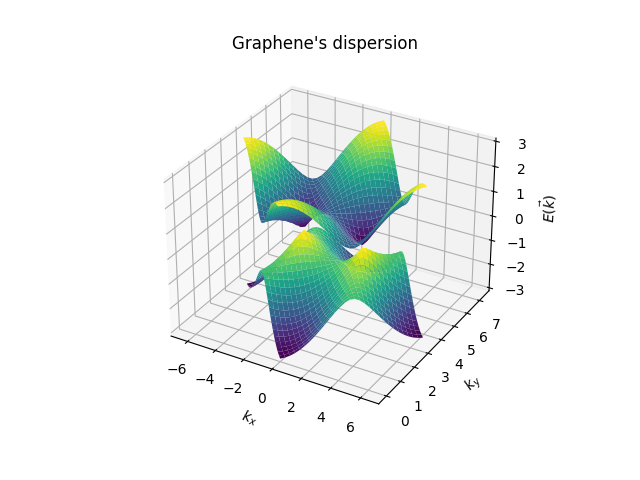

In [ ]:
my_print(r" Replace $t\rightarrow 1$");
nEs= [ sp.lambdify( [k_x,k_y], E_k.subs(t,1) ) for E_k in Es ];

my_print(" The reciprocal lattice vectors");
rec_vec = 2*sp.pi*sp.Matrix(lat_vec).inv()
for i in range(3):
  print_eq(r'$ \vec{b}_{%d}=$'%i,rec_vec[:,i]);
my_print("**Numerical plot of Graphene's dispersion**");

fig = plt.figure();
ax = plt.axes(projection='3d');
ax.set_title('Graphene\'s dispersion ');
ax.set_xlabel(r'$k_x$'); ax.set_ylabel(r'$k_y$');
ax.set_zlabel(r'$E(\vec{k})$');

#Generate the numerical data
n=30;
for nE in nEs:
  #Compute the energies over the whole BZ
  xyz = [];
  for k_1 in np.linspace(0,1,n):
    for k_2 in np.linspace(0,1,n):
      kvec        = sp.Matrix([k_1,k_2,0]);
      nkx, nky,nkz= np.array( rec_vec*kvec ,dtype=float ).flatten();
      xyz.append( [nkx,nky,nE(nkx,nky)] );

  #Reshape the data by prepare
  KX,KY,Ek =[ x.reshape(n,n) for x in np.array(xyz).T];
  ax.plot_surface(KX,KY,Ek, rstride=1, cstride=1,
                  cmap='viridis', edgecolor='none');

### Task 1

Evaluate the eigenvalues at $\vec{k}=0$ and $\vec{k}= \vec{b}_0/3+ 2\vec{b}_1/3$


### The low-energy $(\vec{k}\cdot\vec{p})$ Hamiltonian

In [ ]:
my_print(r"Replace $t\rightarrow 2v/\sqrt{3} $")
v = sp.Symbol("v", positive=True);
H = H.subs(t,2*v/sp.sqrt(3));

my_print(r"**Low energy Hamiltonians**")

R6 = my.Rz(2*sp.pi/6);

K0 = my.graphene.K0;
K1 = my.graphene.K1;

for sK, K in zip( (r"$\vec{K}_0$",r"$\vec{K}_1$"), (K0,K1) ):
  kpH = my.FirstOrderTaylor( H, x=momenta, x0=K  );
  print_eq(sK+"=", sp.Array(K) )
  print_eq(r"$H(\vec{k})=$", kpH );


Replace $t\rightarrow 2v/\sqrt{3} $

**Low energy Hamiltonians**

$\vec{K}_0$= $\left[\begin{matrix}\frac{4 \pi}{3} & 0 & 0\end{matrix}\right]$ 

$H(\vec{k})=$ $\left[\begin{matrix}0 & v \left(- k_{x} - i k_{y}\right)\\v \left(- k_{x} + i k_{y}\right) & 0\end{matrix}\right]$ 

$\vec{K}_1$= $\left[\begin{matrix}- \frac{4 \pi}{3} & 0 & 0\end{matrix}\right]$ 

$H(\vec{k})=$ $\left[\begin{matrix}0 & v \left(k_{x} - i k_{y}\right)\\v \left(k_{x} + i k_{y}\right) & 0\end{matrix}\right]$ 